In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize']=[10,6]

In [274]:
df=pd.read_csv('googleplaystore.csv')
df.head(4)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up


In [275]:
df.drop(['Current Ver','Android Ver'],axis=1,inplace=True)

#### Checking for Null Value and Dropping

In [276]:
df.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [277]:
#Since Rating is the target feature, we can't replace NaN values with Mean/Median values. 
#Therefore, we drop all all rows that have Null values
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.isnull().sum()

index             0
Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

#### Defining 2 functions for Data Formatting for 'Size' and 'Installs'

In [278]:
def getnumber(s):
    number=""
    for i in s:
        if i>='0' and i<='9':
            number+=i
        if i=='.':
            number+=i
    if number=="":
        print('No digits')
    else:
        return float(number)
## This function returns all the digits from a string 

In [279]:
def getalphabet(s):
    alphabet=""
    for i in s:
        if i>='a' and i<='z':
            alphabet+=i
        elif i>='A' and i<='Z':
            alphabet+=i
    return alphabet
## This function returns all the alphabets from a string 

In [280]:
size_index = df.columns.get_loc('Size')
installs_index = df.columns.get_loc('Installs')
rows,columns=df.shape
all_sizes=[]
for i in range(0,rows):
    all_sizes.append(getalphabet(df.iloc[i,size_index]))
print(set(all_sizes))

{'M', 'Varieswithdevice', 'k'}


In [281]:
## So we understand that few apps have sizes 'Varieswithdevice'.Hence, we check if such values have any integers associated with it.
vwd_index=[]
for i in range(0,len(all_sizes)):
    if all_sizes[i]=='Varieswithdevice':
        vwd_index.append(i)
for i in vwd_index:
    print(df.iloc[i,size_index])
print('Number of missing/ambiguous size values:',len(vwd_index))

Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with 

In [282]:
## 1637 of 9366 values don't have size data. Initially, we remove the rows with missing sizes.
## After analysis, if we find that there's not a strong correlation between size and ratings, we remove the size column altogether
data=df.copy()
for i in vwd_index:
    data.drop(index=i,inplace=True)

In [283]:
rows,columns=data.shape
all_sizes=[]
for i in range(0,rows):
    all_sizes.append(getalphabet(data.iloc[i,size_index]))
print(set(all_sizes))

{'M', 'k'}


In [284]:
## Now we have all the sizes in either KB or MB. We now convert MB to KB and everything from String to Int.
for i in range(0,rows):
    if getalphabet(data.iloc[i,size_index])=='M':
        data.iloc[i,size_index]=getnumber(data.iloc[i,size_index])*1000
    else:
        data.iloc[i,size_index]=getnumber(data.iloc[i,size_index])   

In [285]:
for i in range(0,rows):
    data.iloc[i,installs_index]=getnumber(data.iloc[i,installs_index])

In [286]:
data.drop('index',axis=1,inplace=True)

In [287]:
price_index = data.columns.get_loc('Price')
for i in range(0,rows):
    data.iloc[i,price_index]=getnumber(data.iloc[i,price_index])

In [288]:
print('Maximum app rating=',data['Rating'].max())
print('Minimum app rating=',data['Rating'].min())

Maximum app rating= 5.0
Minimum app rating= 1.0


In [289]:
data.head(4)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000,10000,Free,0,Everyone,Art & Design,07-Jan-18
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700,5000000,Free,0,Everyone,Art & Design,01-Aug-18
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000,50000000,Free,0,Teen,Art & Design,08-Jun-18


In [290]:
## Dropping values where number of installs are less than the number of reviews.
data.drop(data[data.Installs<data.Reviews].index,axis=0,inplace=True)

In [291]:
## Checking if all the Free apps have price = 0
data[data.Type=='Free'].Price.sum()  ##The sum of prices of all the Free apps should be 0.

0.0

### Performing Univariate Analysis and Outlier detection/removal

{'whiskers': [<matplotlib.lines.Line2D at 0x255b2f44f48>,
 'caps': [<matplotlib.lines.Line2D at 0x255b2f17ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x255b2f19888>],
 'medians': [<matplotlib.lines.Line2D at 0x255b2f17c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x255b2f2fb08>],
 'means': []}

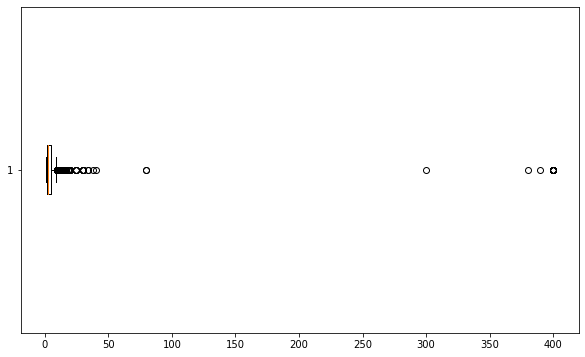

In [292]:
plt.boxplot(data[data.Type!='Free'].Price,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x255b31c0a88>,
 'caps': [<matplotlib.lines.Line2D at 0x255b31c0c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x255b31c01c8>],
 'medians': [<matplotlib.lines.Line2D at 0x255b31c5f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x255b31c5c88>],
 'means': []}

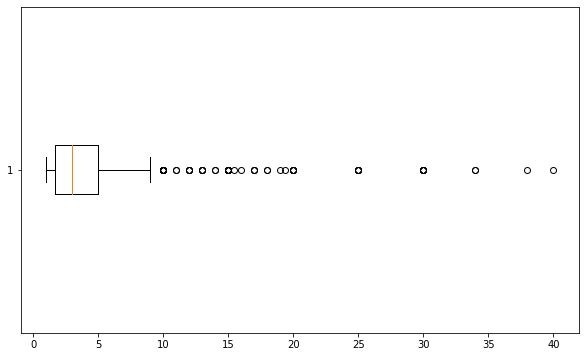

In [293]:
## From the BoxPlot we can definitely see that the Prices above 50$ are obvious outliers. Therefore we first remove those and then compute the quartiles of the remaining data.
data.drop(data[data.Price>50].index,axis=0,inplace=True)
plt.boxplot(data[data.Type!='Free'].Price,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x255b31e9ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x255b31eebc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x255b31e97c8>],
 'medians': [<matplotlib.lines.Line2D at 0x255b31eed48>],
 'fliers': [<matplotlib.lines.Line2D at 0x255b31f4c08>],
 'means': []}

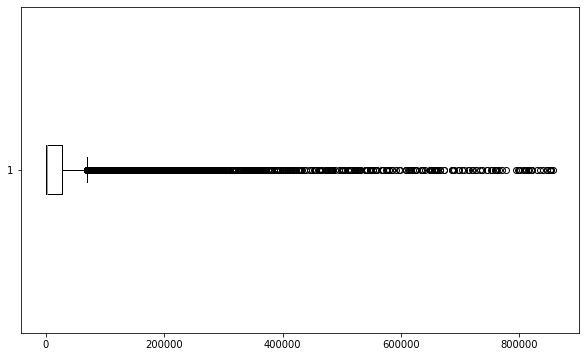

In [294]:
#we remove records with over 10 million reviews
data.drop(data[data.Reviews>data['Reviews'].quantile(0.95)].index,axis=0,inplace=True)
plt.boxplot(data.Reviews,vert=False)

Text(0, 0.5, 'Number of Apps')

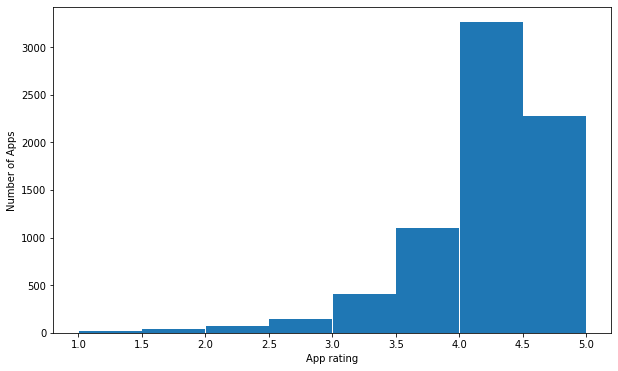

In [295]:
data['Rating'].plot.hist(bins=8,rwidth=0.99)
plt.xlabel('App rating')
plt.ylabel('Number of Apps')

Text(0, 0.5, 'Number of Apps')

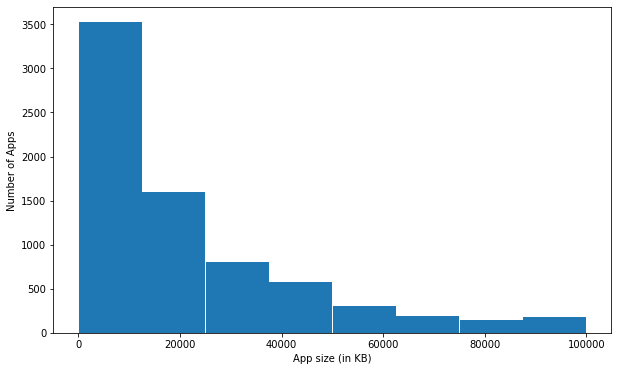

In [296]:
## Majority of the apps have higher ratings.(most between 4.0 to 4.5)
data['Size'].plot.hist(bins=8,rwidth=0.99)
plt.xlabel('App size (in KB)')
plt.ylabel('Number of Apps')

### Performing bivariate analysis

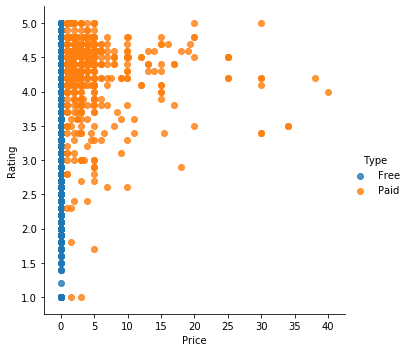

In [297]:
sns.lmplot(x="Price",y="Rating",hue='Type',data=data,fit_reg=False)

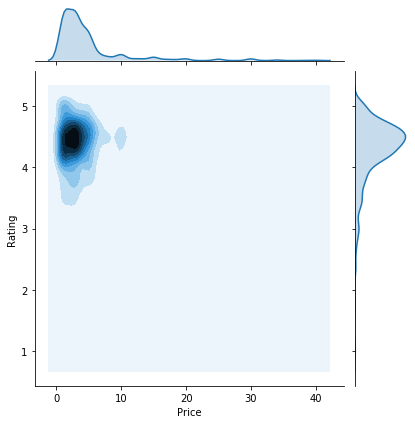

In [298]:
## Apparently,there is no strong correlation between Ratings and Price.Majority of the paid apps have a higher rating.
sns.jointplot(x=data[data.Type=='Paid']['Price'],y=data[data.Type=='Paid']['Rating'],data=data,kind="kde")

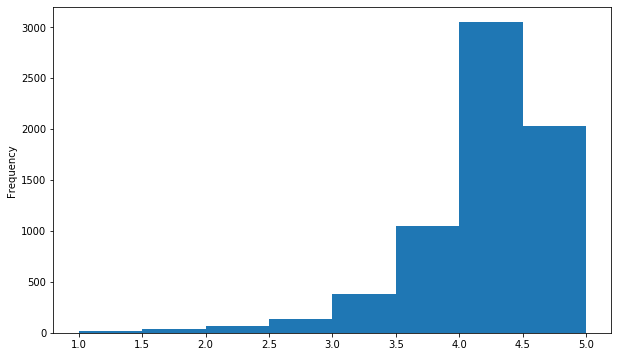

In [299]:
data[data.Type=='Free']['Rating'].plot.hist(bins=8) ##Checking out the trend for Free Apps

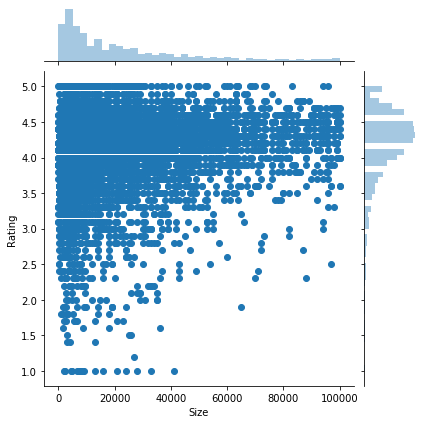

In [300]:
sns.jointplot(x='Size',y='Rating',data=data,kind='scatter')
#We can conclude that the percentage of large apps having high ratings(>4) is more!

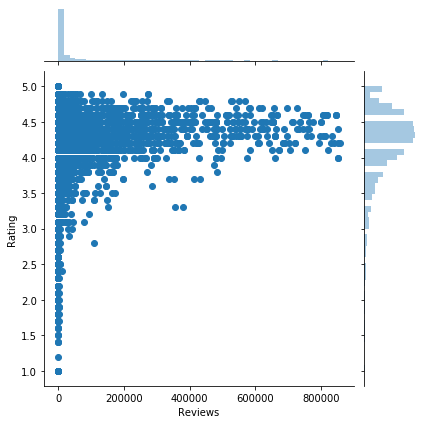

In [301]:
sns.jointplot(x='Reviews',y='Rating',data=data,kind='scatter') #Similar to the Price vs Rating graph. For higher number of reviews, the rating is always greater than 3.5

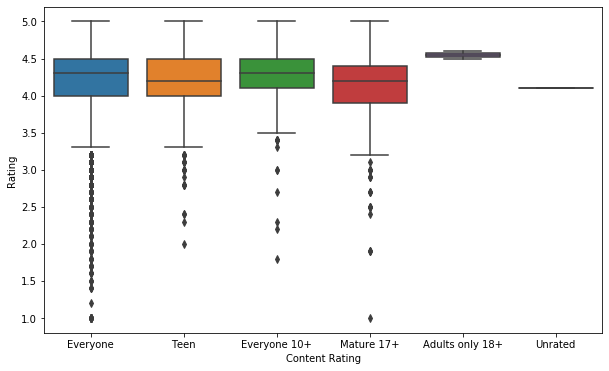

In [302]:
sns.boxplot(x="Content Rating",y="Rating",data=data)

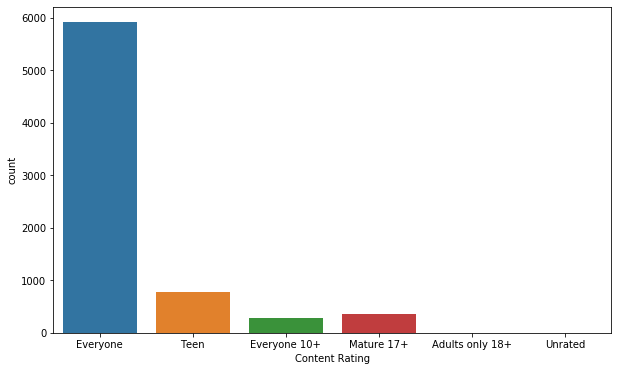

In [303]:
sns.countplot(x='Content Rating',data=data)

In [304]:
#We reduce some of the categories by clubbing similar ones together
category_index=data.columns.get_loc('Category')
rows,columns=data.shape
for i in range(0,rows):
    if data.iloc[i,category_index]=='ART_AND_DESIGN' or data.iloc[i,category_index]=='BEAUTY':
        data.iloc[i,category_index]='Art'
    if data.iloc[i,category_index]=='BOOKS_AND_REFERENCE' or data.iloc[i,category_index]=='COMICS' or data.iloc[i,category_index]=='LIBRARIES_AND_DEMO' or data.iloc[i,category_index]=='NEWS_AND_MAGAZINES':
        data.iloc[i,category_index]='Books'
    if data.iloc[i,category_index]=='BUSINESS' or data.iloc[i,category_index]=='FINANCE':
        data.iloc[i,category_index]='Money'
    if data.iloc[i,category_index]=='SPORTS' or data.iloc[i,category_index]=='GAME':
        data.iloc[i,category_index]='Sport/Game'
    if data.iloc[i,category_index]=='HEALTH_AND_FITNESS' or data.iloc[i,category_index]=='LIFESTYLE' or data.iloc[i,category_index]=='MEDICAL':
        data.iloc[i,category_index]='Health'
    if data.iloc[i,category_index]=='MAPS_AND_NAVIGATION' or data.iloc[i,category_index]=='TRAVEL_AND_LOCAL' or data.iloc[i,category_index]=='WEATHER':
        data.iloc[i,category_index]='Maps/Travel'
    if data.iloc[i,category_index]=='SOCIAL' or data.iloc[i,category_index]=='DATING':
        data.iloc[i,category_index]='Social'

In [305]:
set(data['Category'])

{'AUTO_AND_VEHICLES',
 'Art',
 'Books',
 'COMMUNICATION',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FOOD_AND_DRINK',
 'HOUSE_AND_HOME',
 'Health',
 'Maps/Travel',
 'Money',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'Social',
 'Sport/Game',
 'TOOLS',
 'VIDEO_PLAYERS'}

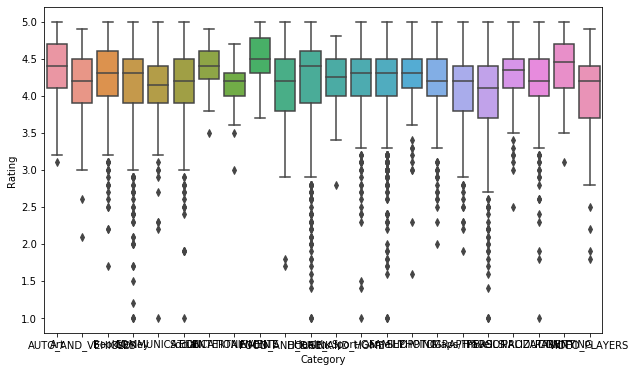

In [306]:
sns.boxplot(x="Category",y="Rating",data=data)

In [307]:
data.drop(['Genres','Last Updated'],axis=1,inplace=True)
data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,Art,159,19000,10000,Free,0,Everyone
1,3.9,Coloring book moana,Art,967,14000,500000,Free,0,Everyone
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art,87510,8700,5000000,Free,0,Everyone
3,4.5,Sketch - Draw & Paint,Art,215644,25000,50000000,Free,0,Teen
4,4.3,Pixel Draw - Number Art Coloring Book,Art,967,2800,100000,Free,0,Everyone


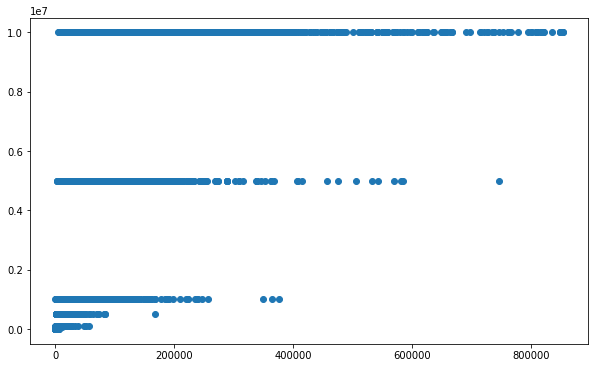

In [308]:
data.drop(data[data.Installs>data['Installs'].quantile(0.95)].index,axis=0,inplace=True)
plt.scatter(data['Reviews'],data['Installs'])

In [309]:
data['Installs'].quantile(0.95)

10000000.0

In [310]:
data['Reviews'].max()

852455

In [311]:
category_variables = pd.get_dummies(data['Category'])
category_variables.drop('Art',axis=1,inplace=True)
data = pd.concat([data,category_variables],axis=1)
data.drop('Category',axis=1,inplace=True)
data.head()

,Rating,App,Reviews,Size,Installs,Type,Price,Content Rating,AUTO_AND_VEHICLES,Books,...,Money,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,Social,Sport/Game,TOOLS,VIDEO_PLAYERS
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,159,19000,10000,Free,0,Everyone,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,Coloring book moana,967,14000,500000,Free,0,Everyone,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700,5000000,Free,0,Everyone,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,Pixel Draw - Number Art Coloring Book,967,2800,100000,Free,0,Everyone,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,Paper flowers instructions,167,5600,50000,Free,0,Everyone,0,0,...,0,0,0,0,0,0,0,0,0,0


In [312]:
conrating_variables = pd.get_dummies(data['Content Rating'])
conrating_variables.drop('Everyone',axis=1,inplace=True)
data = pd.concat([data,conrating_variables],axis=1)
data.drop('Content Rating',axis=1,inplace=True)
data.head()

,Rating,App,Reviews,Size,Installs,Type,Price,AUTO_AND_VEHICLES,Books,COMMUNICATION,...,SHOPPING,Social,Sport/Game,TOOLS,VIDEO_PLAYERS,Adults only 18+,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,159,19000,10000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,Coloring book moana,967,14000,500000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700,5000000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,Pixel Draw - Number Art Coloring Book,967,2800,100000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,Paper flowers instructions,167,5600,50000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
X_data=data[['Reviews','Size','Installs']]
y=data['Rating']
X_data

,Reviews,Size,Installs
0,159,19000,10000
1,967,14000,500000
2,87510,8700,5000000
4,967,2800,100000
5,167,5600,50000
...,...,...,...
9360,44,619,1000
9361,7,2600,500
9362,38,53000,5000
9363,4,3600,100


In [314]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_data)
X=scaler.transform(X_data)
X=pd.DataFrame(data=X,columns=['Rev','Size_new','Inst'],index=X_data.index)
X=pd.concat([data,X],axis=1)
X

,Rating,App,Reviews,Size,Installs,Type,Price,AUTO_AND_VEHICLES,Books,COMMUNICATION,...,TOOLS,VIDEO_PLAYERS,Adults only 18+,Everyone 10+,Mature 17+,Teen,Unrated,Rev,Size_new,Inst
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,159,19000,10000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0.000185,0.189931,0.00100
1,3.9,Coloring book moana,967,14000,500000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0.001133,0.139927,0.05000
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700,5000000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0.102655,0.086922,0.50000
4,4.3,Pixel Draw - Number Art Coloring Book,967,2800,100000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0.001133,0.027917,0.01000
5,4.4,Paper flowers instructions,167,5600,50000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0.000195,0.055920,0.00500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,4.8,Chemin (fr),44,619,1000,Free,0,0,1,0,...,0,0,0,0,0,0,0,0.000050,0.006106,0.00010
9361,4.0,FR Calculator,7,2600,500,Free,0,0,0,0,...,0,0,0,0,0,0,0,0.000007,0.025917,0.00005
9362,4.5,Sya9a Maroc - FR,38,53000,5000,Free,0,0,0,0,...,0,0,0,0,0,0,0,0.000043,0.529960,0.00050
9363,5.0,Fr. Mike Schmitz Audio Teachings,4,3600,100,Free,0,0,0,0,...,0,0,0,0,0,0,0,0.000004,0.035918,0.00001


In [315]:
X.drop(['Reviews','Size','Installs'],axis=1,inplace=True)
X.head(3)

,Rating,App,Type,Price,AUTO_AND_VEHICLES,Books,COMMUNICATION,EDUCATION,ENTERTAINMENT,EVENTS,...,TOOLS,VIDEO_PLAYERS,Adults only 18+,Everyone 10+,Mature 17+,Teen,Unrated,Rev,Size_new,Inst
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,Free,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000185,0.189931,0.001
1,3.9,Coloring book moana,Free,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.001133,0.139927,0.050
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Free,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.102655,0.086922,0.500


In [316]:
X=X.drop('Rating',axis=1)
X

,App,Type,Price,AUTO_AND_VEHICLES,Books,COMMUNICATION,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,...,TOOLS,VIDEO_PLAYERS,Adults only 18+,Everyone 10+,Mature 17+,Teen,Unrated,Rev,Size_new,Inst
0,Photo Editor & Candy Camera & Grid & ScrapBook,Free,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000185,0.189931,0.00100
1,Coloring book moana,Free,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.001133,0.139927,0.05000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Free,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.102655,0.086922,0.50000
4,Pixel Draw - Number Art Coloring Book,Free,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.001133,0.027917,0.01000
5,Paper flowers instructions,Free,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000195,0.055920,0.00500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,Chemin (fr),Free,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000050,0.006106,0.00010
9361,FR Calculator,Free,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.000007,0.025917,0.00005
9362,Sya9a Maroc - FR,Free,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.000043,0.529960,0.00050
9363,Fr. Mike Schmitz Audio Teachings,Free,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.000004,0.035918,0.00001


In [322]:
X.drop('Type',axis=1,inplace=True)
X.drop('App',axis=1,inplace=True)

In [354]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
rf_random = RandomForestRegressor()
y_test

2908    4.0
3147    4.4
8475    4.1
4853    4.1
7781    4.3
       ... 
8356    4.9
5552    4.1
33      4.7
940     4.2
8182    4.2
Name: Rating, Length: 1451, dtype: float64

In [355]:
rf_random.fit(X_train,y_train)
predictions=rf_random.predict(X_test)
predictions

C:\Users\Shravan Tawri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([4.1 , 4.44, 4.25, ..., 4.02, 4.2 , 4.76])

In [356]:
#results=pd.DataFrame(data=y_test,columns='Y_test_actual',index=range(len(y_test)))
#results
y_test.reset_index(drop=True,inplace=True)

In [357]:
y_test

0       4.0
1       4.4
2       4.1
3       4.1
4       4.3
       ... 
1446    4.9
1447    4.1
1448    4.7
1449    4.2
1450    4.2
Name: Rating, Length: 1451, dtype: float64

In [360]:
results=pd.DataFrame(columns=['Y_test_actual','Predicted'])
results['Y_test_actual']=y_test
results['Predicted']=predictions

In [361]:
results

,Y_test_actual,Predicted
0,4.0,4.10
1,4.4,4.44
2,4.1,4.25
3,4.1,4.06
4,4.3,3.66
...,...,...
1446,4.9,3.74
1447,4.1,4.28
1448,4.7,4.02
1449,4.2,4.20


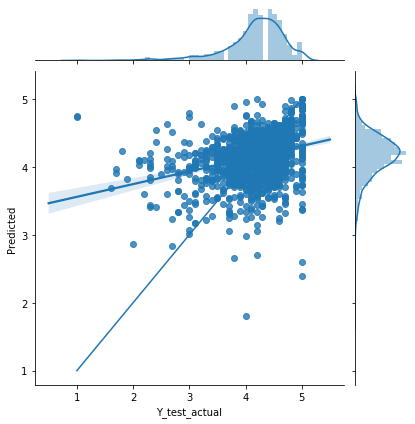

In [372]:
sns.jointplot(x='Y_test_actual',y='Predicted',data=results,kind="reg")
plt.plot([1,5],[1,5])
plt.show()

In [367]:
from sklearn import metrics
r_square=metrics.r2_score(y_test,predictions)
r_square

-0.0027160114815689695

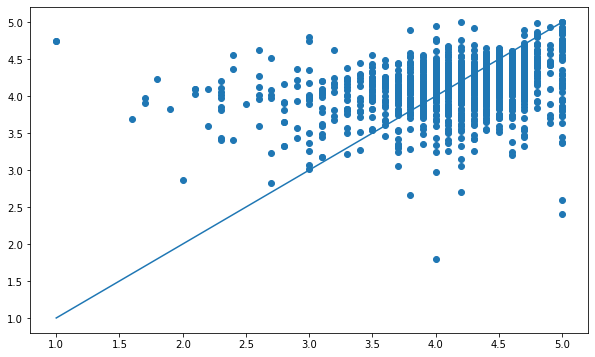

In [375]:
plt.scatter(y_test,predictions)
plt.plot([1,5],[1,5])